<a href="https://colab.research.google.com/github/alexrzntsv/TOBD-FU/blob/main/5.visualization/05_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed


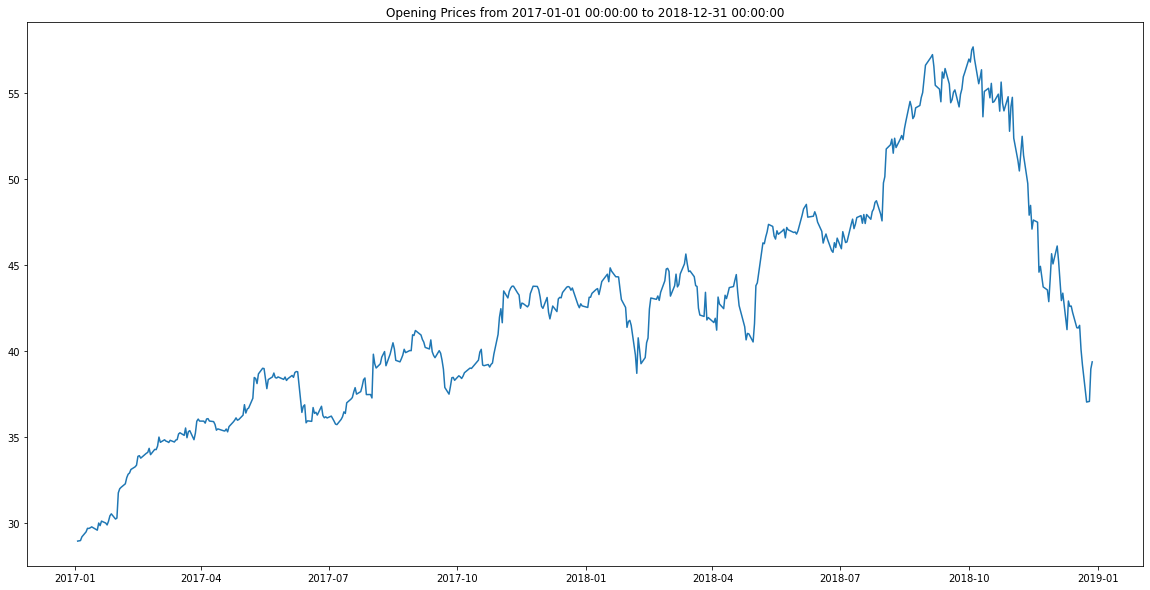

In [3]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
  
# initialize parameters
start_date = datetime(2017, 1, 1)
end_date = datetime(2018, 12, 31)
  
# get the data
data = yf.download('AAPL', start = start_date,
                   end = end_date)
  
# display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Open'])
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.174757,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.144339,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.282379,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.586535,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.839209,134247600


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


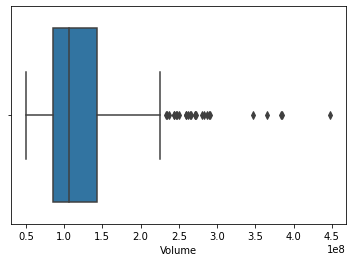

In [5]:
import seaborn as sns
sns.boxplot(data['Volume'])

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [7]:
arr = np.load('average_ratings.npy')
arr.shape

(3, 1095)

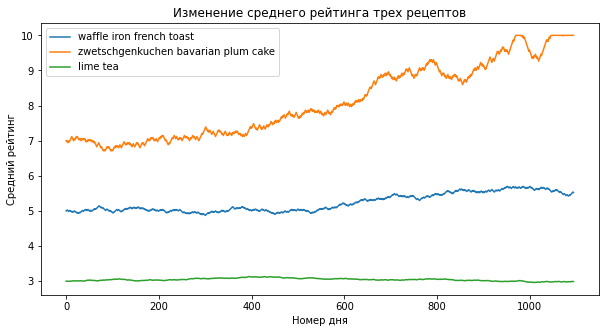

In [8]:
plt.figure(figsize = (10,5))
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

plt.plot(arr[0], label='waffle iron french toast')
plt.plot(arr[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(arr[2], label='lime tea')


plt.legend()
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [9]:
dates = pd.date_range(start='2019-01-01', end='2021-12-30')
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

In [10]:
import matplotlib.dates as mdates

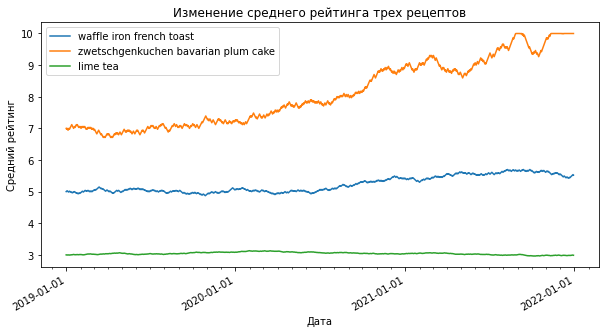

In [11]:
plt.figure(figsize = (10,5))
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

plt.plot(dates, arr[0], label='waffle iron french toast')
plt.plot(dates, arr[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(dates, arr[2], label='lime tea')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

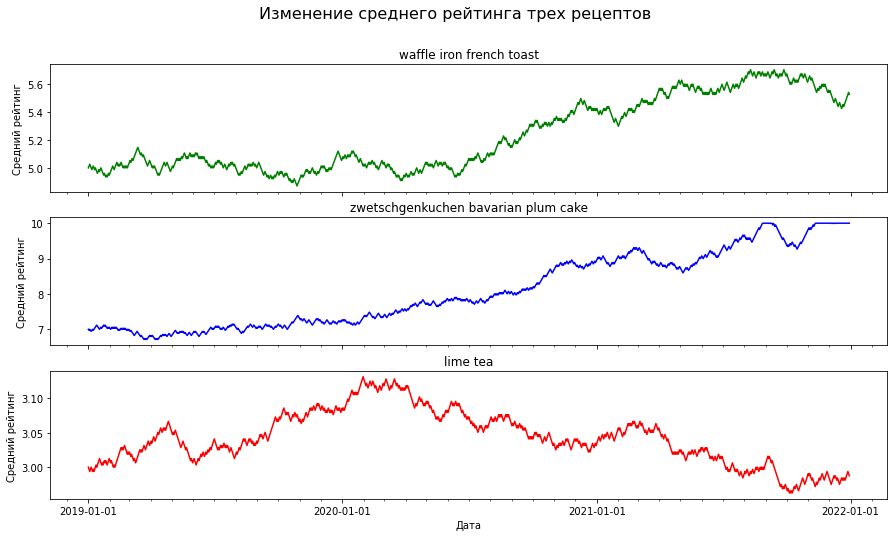

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(15,8))

#-----
ax0.plot(dates, arr[0], 'green')
ax0.xaxis.set_ticklabels([])
ax0.set_ylabel('Средний рейтинг')
ax0.set_title('waffle iron french toast')
#-----
# Ступнчатая диаграмма, шаг в начале
ax1.plot(dates, arr[1], 'blue')
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel('Средний рейтинг')
ax1.set_title('zwetschgenkuchen bavarian plum cake')
#-----
# Ступнчатая диаграмма, шаг в конце
ax2.plot(dates, arr[2], 'red')
ax2.set_ylabel('Средний рейтинг')
ax2.set_title('lime tea')
ax2.set_xlabel('Дата')
#-----
for ax in (ax0, ax1, ax2):

  ax.xaxis.set_major_locator(mdates.YearLocator())
  ax.xaxis.set_minor_locator(mdates.MonthLocator())

fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize=16)

fig.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [14]:
arr = np.load('visitors.npy')
arr.shape

(100,)

Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

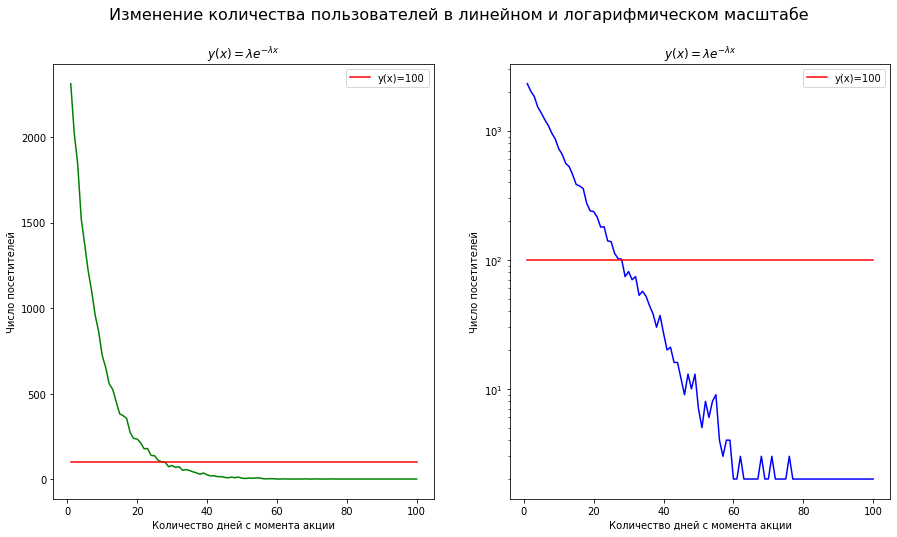

In [23]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

#-----
ax0.plot(range(1, 101), arr, 'green')
ax0.plot(range(1, 101), [100]*100, 'red', label='y(x)=100')
ax0.set_ylabel('Число посетителей')
ax0.set_xlabel("Количество дней с момента акции")
ax0.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax0.legend()
#-----
# Ступнчатая диаграмма, шаг в начале
ax1.semilogy(range(1, 101), arr, 'blue')
ax1.plot(range(1, 101), [100]*100, 'red', label='y(x)=100')
ax1.set_ylabel('Число посетителей')
ax1.set_xlabel("Количество дней с момента акции")
ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax1.legend()


fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=16)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [109]:
reviews = pd.read_csv('reviews_sample.csv', index_col=1)
recipes = pd.read_csv('recipes_sample.csv', index_col=1)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
reviews.head()

,Unnamed: 0,recipe_id,date,rating,review
user_id,,,,,
2.175200e+04,370476,57993.0,2003-05-01,5.0,Last week whole sides of frozen salmon fillet ...
4.318130e+05,624300,142201.0,2007-09-16,5.0,So simple and so tasty! I used a yellow capsi...
4.007080e+05,187037,252013.0,2008-01-10,4.0,"Very nice breakfast HH, easy to make and yummy..."
2.001852e+09,706134,404716.0,2017-12-11,5.0,These are a favorite for the holidays and so e...
9.581000e+04,312179,129396.0,2008-03-14,5.0,Excellent soup! The tomato flavor is just gre...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [120]:
def group(row):
    if row['minutes'] < 5:
      return 'короткий'
    elif 5 <= row['minutes'] < 50:
      return 'средний'
    else:
      return 'длинный'

In [121]:
recipes['group'] = recipes.apply(lambda row : group(row), axis=1) 
recipes.head()

,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,group
id,,,,,,,,
44123,george s at the cove black bean soup,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный
67664,healthy for them yogurt popsicles,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний
38798,i can t believe it s spinach,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний
35173,italian gut busters,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний
84797,love is in the air beef fondue sauces,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний


Text(0.5, 1.0, 'Размеры групп рецептов')

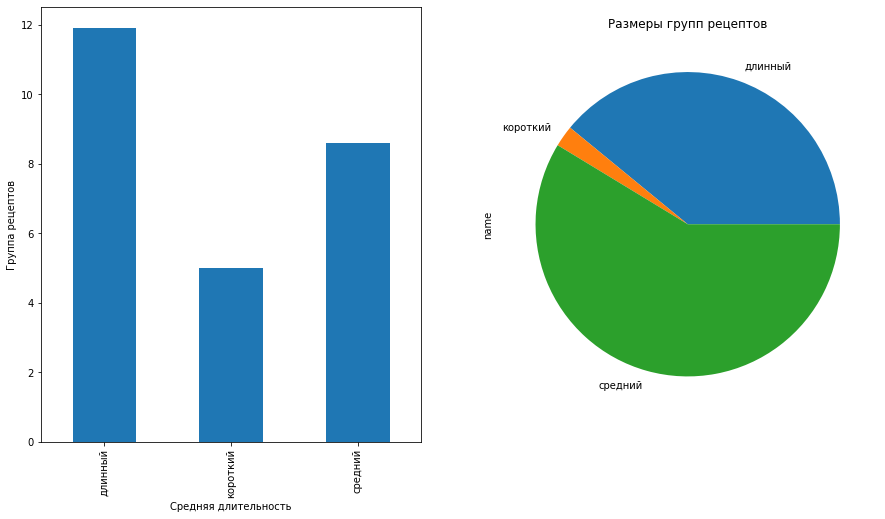

In [156]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

#---------------------------------------
recipes.groupby('group').mean()['n_steps'].plot(kind='bar', ax=ax0)
ax0.set_ylabel('Группа рецептов')
ax0.set_xlabel("Средняя длительность")
#---------------------------------------
recipes.groupby('group').count().name.plot(kind='pie')
ax1.set_title('Размеры групп рецептов')


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [110]:
reviews['year'] = reviews['date'].astype(str).apply(lambda s: s.split('-')[0])

In [112]:
reviews_2008 = reviews.loc[(reviews['year'] == '2008')]
reviews_2009 = reviews.loc[(reviews['year'] == '2009')]

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

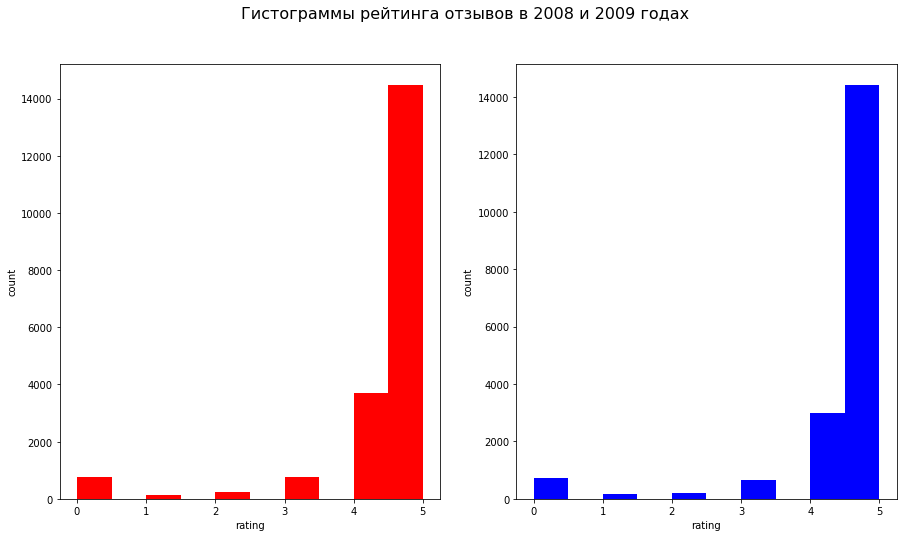

In [118]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

#---------------------------------------
reviews_2008['rating'].plot.hist(ax=ax0, color='red')
ax0.set_ylabel('count')
ax0.set_xlabel("rating")
#---------------------------------------
reviews_2009['rating'].plot.hist(ax=ax1, color='blue')
ax1.set_ylabel('count')
ax1.set_xlabel("rating")

fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах", fontsize=16)


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

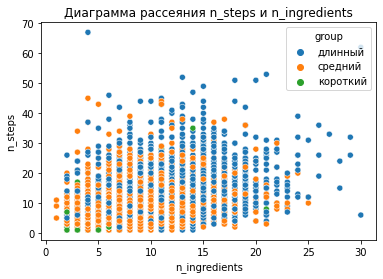

In [148]:
plot = sns.scatterplot(data=recipes, x="n_ingredients", y="n_steps", hue='group')
plot.set_title('Диаграмма рассеяния n_steps и n_ingredients')

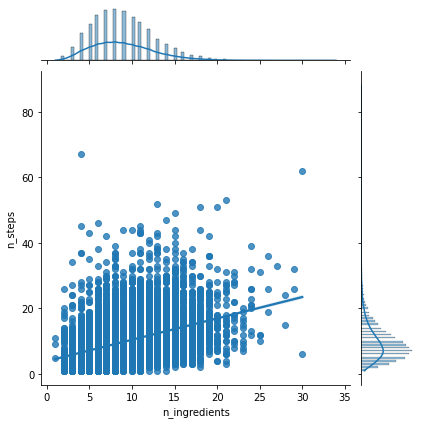

In [149]:
sns.jointplot(data=recipes, x="n_ingredients", y="n_steps", kind='reg');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [139]:
df = recipes.merge(reviews, left_on='id', right_on='recipe_id', how='inner')[['minutes', 'n_steps', 'n_ingredients', 'rating']]

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

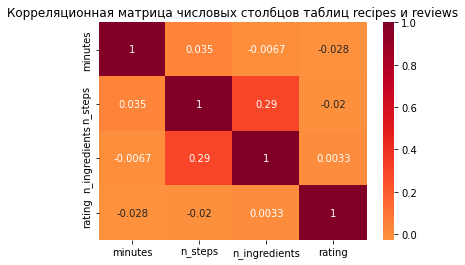

In [144]:
dataplot = sns.heatmap(df.corr(), cmap='YlOrRd', center=0.0, annot = True)
dataplot.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')